In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# читаю данные по прямым ссылкам

assessments = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/iSVP1sZ7AdW7TQ')
courses = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/jmJxR8yhwCXlaw')
student_assessment = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/DYd4M5b_8RETsA')
student_registration = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/lqHnH8NOZ458iw')

In [3]:
# assessments.csv — этот файл содержит информацию об оценках в тесте.
# Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).
# code_module — идентификационный код предмета.
# code_presentation — семестр (Идентификационный код).
# id_assessment — тест (Идентификационный номер ассессмента).
# assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
# date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
# weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
assessments.assessment_type.unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [5]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [6]:
# courses.csv — файл содержит список предметов по семестрам.
# code_module — предмет (идентификационный код).
# code_presentation — семестр (идентификационный код).
# module_presentation_length — продолжительность семестра в днях.

courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [7]:
# всего педметов
courses.code_module.nunique()

7

In [8]:
courses.code_module.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [9]:
# всего семестров

courses.code_presentation.nunique()

4

In [10]:
courses.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [11]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [12]:
# studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
# id_assessment — тест (идентификационный номер).
# id_student — идентификационный номер студента.
# date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
# is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
# score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [13]:
# кол-во студентов сдавших работы на оценку
student_assessment.id_student.nunique()

23369

In [14]:
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [15]:
# studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
# code_module — предмет (идентификационный код).
# code_presentation — семестр (идентификационный код)
# id_student — идентификационный номер студента.
# date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).
# date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [16]:
# кол-во студентов зарегистрировавшихся

student_registration.id_student.nunique()

28785

In [17]:
student_registration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [18]:
# собираю все данные в один df

student_assessment_registration = student_registration.merge(student_assessment, how='left', on='id_student')

student_assessment_registration_assessments = student_assessment_registration.merge(assessments, how='left', on=['id_assessment','code_module','code_presentation'])

all_data = student_assessment_registration_assessments.merge(courses, how='left', on=['code_module','code_presentation'])

all_data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,1752.0,18.0,0.0,78.0,TMA,19.0,10.0,268
1,AAA,2013J,11391,-159.0,NaN,1753.0,53.0,0.0,85.0,TMA,54.0,20.0,268
2,AAA,2013J,11391,-159.0,NaN,1754.0,115.0,0.0,80.0,TMA,117.0,20.0,268
3,AAA,2013J,11391,-159.0,NaN,1755.0,164.0,0.0,85.0,TMA,166.0,20.0,268
4,AAA,2013J,11391,-159.0,NaN,1756.0,212.0,0.0,82.0,TMA,215.0,30.0,268


In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213166 entries, 0 to 213165
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 213166 non-null  object 
 1   code_presentation           213166 non-null  object 
 2   id_student                  213166 non-null  int64  
 3   date_registration           213077 non-null  float64
 4   date_unregistration         30431 non-null   float64
 5   id_assessment               207319 non-null  float64
 6   date_submitted              207319 non-null  float64
 7   is_banked                   207319 non-null  float64
 8   score                       207092 non-null  float64
 9   assessment_type             173912 non-null  object 
 10  date                        171047 non-null  float64
 11  weight                      173912 non-null  float64
 12  module_presentation_length  213166 non-null  int64  
dtypes: float64(8),

In [20]:
# считаю пропуски значений в этих столбцах - ошибкой, данные без этих значений не можем принимать к анализу

all_data = all_data.dropna(subset=['date_registration', 'id_assessment','date_submitted','is_banked','score','assessment_type'])

In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173732 entries, 0 to 213165
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 173732 non-null  object 
 1   code_presentation           173732 non-null  object 
 2   id_student                  173732 non-null  int64  
 3   date_registration           173732 non-null  float64
 4   date_unregistration         12976 non-null   float64
 5   id_assessment               173732 non-null  float64
 6   date_submitted              173732 non-null  float64
 7   is_banked                   173732 non-null  float64
 8   score                       173732 non-null  float64
 9   assessment_type             173732 non-null  object 
 10  date                        170867 non-null  float64
 11  weight                      173732 non-null  float64
 12  module_presentation_length  173732 non-null  int64  
dtypes: float64(8),

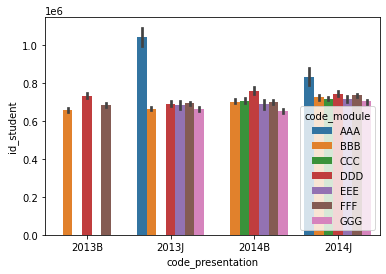

In [22]:
# распределение студентов по семестрам в разбивке по предметам

sns.barplot(x=all_data.code_presentation.sort_values(), y=all_data.id_student, hue=all_data.code_module)

In [23]:
# экзамены по семестрам в разбивке по предметам

exam_code_presentation = all_data.query('assessment_type == "Exam"').groupby(['code_presentation','code_module'],as_index=False).agg({'assessment_type': 'count'})
exam_code_presentation 

,code_presentation,code_module,assessment_type
0,2013B,DDD,602
1,2013J,DDD,968
2,2014B,CCC,747
3,2014B,DDD,524
4,2014J,CCC,1168
5,2014J,DDD,950


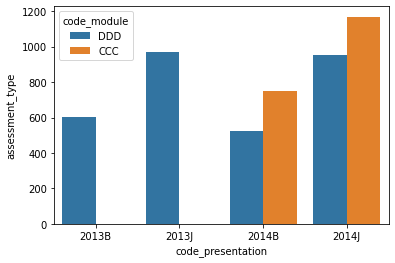

In [24]:
# распределение экзаменов по семестрам в разбивке по предметам

sns.barplot(x=exam_code_presentation.code_presentation, y=exam_code_presentation.assessment_type, hue=exam_code_presentation.code_module)

 **Рассмотрев распределения считаю, что:**  
 
- в 2013B семестре был курс №1 - набор предметов, с экзаменом по предмету "DDD"  
- в 2013J семестре добавились предметы, без экзаменов (возможно, в качестве эксперимента)  
- в 2014B семестре добавился курс №2 - набор предметов, с экзаменом по предмету "ССС" 



# 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).


In [25]:
# зачёт по экзамену = оценка экзамена > 39

all_data.query('assessment_type == "Exam" & score > 39')\
          .groupby('id_student',as_index=False)\
          .agg({'code_module':'nunique'})\
          .query('code_module ==1')\
          .count()

# отбираю сданные экзамены
# считаю кол-во уникальны курсов у каждого студента
# отбираю с одним курсом
# счтаю кол-во таких студентов

id_student     3805
code_module    3805
dtype: int64

In [26]:
# 3805 студентов успешно сдали только один курс

In [27]:
#=====================================================================

# 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью. 

In [28]:
# завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [29]:
# кол-во успешных экзаменов
exam_passed = all_data.query('assessment_type == "Exam" & score > 39').groupby(['code_presentation','code_module'],as_index=False).agg({'assessment_type': 'count'})
exam_passed.rename(columns = {'assessment_type':'exam_passed'}, inplace = True)
exam_passed

,code_presentation,code_module,exam_passed
0,2013B,DDD,504
1,2013J,DDD,878
2,2014B,CCC,664
3,2014B,DDD,485
4,2014J,CCC,1019
5,2014J,DDD,842


In [30]:
# кол-во всех попыток сдать экзамен

exam_all = all_data.query('assessment_type == "Exam"').groupby(['code_presentation','code_module'],as_index=False).agg({'assessment_type': 'count'})
exam_all.rename(columns = {'assessment_type':'exam_all'}, inplace = True)
exam_all

,code_presentation,code_module,exam_all
0,2013B,DDD,602
1,2013J,DDD,968
2,2014B,CCC,747
3,2014B,DDD,524
4,2014J,CCC,1168
5,2014J,DDD,950


In [31]:
# соеденяю таблицы

completion_exam = exam_passed.merge(exam_all,on=['code_presentation','code_module'])

completion_exam

,code_presentation,code_module,exam_passed,exam_all
0,2013B,DDD,504,602
1,2013J,DDD,878,968
2,2014B,CCC,664,747
3,2014B,DDD,485,524
4,2014J,CCC,1019,1168
5,2014J,DDD,842,950


In [32]:
# добавляю колонку с завершаемостью

completion_exam['completion'] = round(completion_exam.exam_passed / completion_exam.exam_all,3)
completion_exam

,code_presentation,code_module,exam_passed,exam_all,completion
0,2013B,DDD,504,602,0.837
1,2013J,DDD,878,968,0.907
2,2014B,CCC,664,747,0.889
3,2014B,DDD,485,524,0.926
4,2014J,CCC,1019,1168,0.872
5,2014J,DDD,842,950,0.886


In [33]:
# самый простой экзамен

completion_exam[completion_exam['completion'] == completion_exam['completion'].max()]

,code_presentation,code_module,exam_passed,exam_all,completion
3,2014B,DDD,485,524,0.926


In [34]:
# самый сложный экзамен

completion_exam[completion_exam['completion'] == completion_exam['completion'].min()]

,code_presentation,code_module,exam_passed,exam_all,completion
0,2013B,DDD,504,602,0.837


In [35]:
# самый сложный экзамен "DDD 2013B" завершаемость 0.837 
# самый простой экзамен "DDD 2014B" завершаемость 0.926

In [36]:
#=======================================================================

# 3. По каждому предмету определи средний срок сдачи экзаменов
(под сдачей понимаем последнее успешное прохождение экзамена студентом).

In [37]:
# df где только экзамены

exam = all_data.query('assessment_type == "Exam" ')
exam.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,module_presentation_length
50330,CCC,2014B,29764,-34.0,NaN,24290.0,230.0,0.0,94.0,Exam,NaN,100.0,241
50339,CCC,2014B,29820,-57.0,NaN,24290.0,230.0,0.0,76.0,Exam,NaN,100.0,241
50351,CCC,2014B,40604,-17.0,NaN,24290.0,234.0,0.0,66.0,Exam,NaN,100.0,241
50360,CCC,2014B,42638,-52.0,NaN,24290.0,230.0,0.0,50.0,Exam,NaN,100.0,241
50389,CCC,2014B,46605,-54.0,NaN,24290.0,230.0,0.0,98.0,Exam,NaN,100.0,241


In [38]:
# отбираю упешно сданные экзамены
# группирую по предметам и семестрам
# беру среднее значение "дата сдачи теста студентом"

mean_date_exam = exam.query('score > 39').groupby(['code_presentation','code_module'],as_index=False).agg({'date_submitted': 'mean'}).round(2)
mean_date_exam.rename(columns = {'date_submitted':'mean_date'}, inplace = True)

In [39]:
# средний срок сдачи экзаменов по каждому предмету

mean_date_exam

,code_presentation,code_module,mean_date
0,2013B,DDD,230.16
1,2013J,DDD,239.51
2,2014B,CCC,231.58
3,2014B,DDD,234.94
4,2014J,CCC,244.40
5,2014J,DDD,242.80


In [40]:
#============================================================

# 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

In [41]:
# кол-во зарегестрировавшихся студентов по предметам

number_registrations = student_registration.groupby('code_module',as_index=False).agg({'id_student': 'nunique'})
number_registrations

,code_module,id_student
0,AAA,712
1,BBB,7692
2,CCC,4251
3,DDD,5848
4,EEE,2859
5,FFF,7397
6,GGG,2525


In [42]:
# ТОП-3 по количеству регистраций на предметы

number_registrations.sort_values('id_student',ascending=False).head(3)

,code_module,id_student
1,BBB,7692
5,FFF,7397
3,DDD,5848


In [43]:
# кол-во отмен регестраций студентов с предмета

number_unregistrations = student_registration.groupby('code_module',as_index=False).agg({'date_unregistration': 'count'})
number_unregistrations

,code_module,date_unregistration
0,AAA,126
1,BBB,2377
2,CCC,1947
3,DDD,2235
4,EEE,718
5,FFF,2380
6,GGG,289


In [44]:
# соеденяю таблицы

cr_module = number_registrations.merge(number_unregistrations, on='code_module')
cr_module

,code_module,id_student,date_unregistration
0,AAA,712,126
1,BBB,7692,2377
2,CCC,4251,1947
3,DDD,5848,2235
4,EEE,2859,718
5,FFF,7397,2380
6,GGG,2525,289


In [45]:
# добавляю колонку с оттоком

cr_module['cr'] = (cr_module.date_unregistration / cr_module.id_student*100).round(2)
cr_module

,code_module,id_student,date_unregistration,cr
0,AAA,712,126,17.70
1,BBB,7692,2377,30.90
2,CCC,4251,1947,45.80
3,DDD,5848,2235,38.22
4,EEE,2859,718,25.11
5,FFF,7397,2380,32.18
6,GGG,2525,289,11.45


In [46]:
# ТОП-3 по размеру оттока с предметов

cr_module.sort_values('cr',ascending=False).head(3)

,code_module,id_student,date_unregistration,cr
2,CCC,4251,1947,45.80
3,DDD,5848,2235,38.22
5,FFF,7397,2380,32.18


In [47]:
#==================================================================

# 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими      средними сроками сдачи курсов.

In [48]:
# успешно зданные экзамены по семестрам

exam_passed_presentation = exam.query('score > 39').groupby('code_presentation',as_index=False).agg({'id_student':'count'})
exam_passed_presentation.rename(columns = {'id_student':'exam_passed'}, inplace = True)
exam_passed_presentation

,code_presentation,exam_passed
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [49]:
# все экзамены по семестрам

exam_all_presentation = exam.groupby('code_presentation',as_index=False).agg({'id_student':'count'})
exam_all_presentation.rename(columns = {'id_student':'exam_all'}, inplace = True)
exam_all_presentation

,code_presentation,exam_all
0,2013B,602
1,2013J,968
2,2014B,1271
3,2014J,2118


In [50]:
# соеденяю таблицы

completion_exam_presentation = exam_passed_presentation.merge(exam_all_presentation, on='code_presentation')

In [51]:
# добавляю столбец с завершеемостью

completion_exam_presentation['completion'] = (completion_exam_presentation.exam_passed / completion_exam_presentation.exam_all).round(3)

In [52]:
# завершаемость по семестрам

completion_exam_presentation

,code_presentation,exam_passed,exam_all,completion
0,2013B,504,602,0.837
1,2013J,878,968,0.907
2,2014B,1149,1271,0.904
3,2014J,1861,2118,0.879


In [53]:
# средний срок сдачи экзаменов по семестрам

mean_date_exam_presentation = exam.query('score > 39').groupby('code_presentation',as_index=False).agg({'date_submitted': 'mean'}).round(2)
mean_date_exam_presentation.rename(columns = {'date_submitted':'mean_date'}, inplace = True)
mean_date_exam_presentation

,code_presentation,mean_date
0,2013B,230.16
1,2013J,239.51
2,2014B,233.00
3,2014J,243.68


In [54]:
# соеденяю таблицы по нужным столбцам

completion_mean_date = completion_exam_presentation.merge(mean_date_exam_presentation, on='code_presentation')
completion_mean_date

,code_presentation,exam_passed,exam_all,completion,mean_date
0,2013B,504,602,0.837,230.16
1,2013J,878,968,0.907,239.51
2,2014B,1149,1271,0.904,233.00
3,2014J,1861,2118,0.879,243.68


In [55]:
# сортирую completion по возрастанию, а mean_date по убыванию

completion_mean_date.sort_values(['completion','mean_date'], ascending=[True, False]).head(1)

,code_presentation,exam_passed,exam_all,completion,mean_date
0,2013B,504,602,0.837,230.16


**В период с начала 2013 по конец 2014 семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов:**  
- является 2013B

In [56]:
#======================================================

# 6. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию.

  В адаптированной кластеризации можешь выбрать следующие метрики:  
  
                     R - среднее время сдачи одного экзамена,  
                     F - завершаемость курсов  
                     M - среднее количество баллов, получаемое за экзамен.  
                     
 Подробно опиши, как ты создавал кластеры.  
 Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров

In [57]:
# кол-во студетов сдававших экзамены (для контроля в следующих шагах)

exam.id_student.nunique()

4633

In [58]:
#  R -среднее время сдачи одного экзамена каждого студента
#  т.к. есть студенты которые сдавали два предмета, есть студенты которые сдавали один предмет  в разные семестры и т.д.
#  такм способом нахожу среднее время сдачи одного экзамена каждого студента

mean_submitted = exam.query('score > 39').groupby(['id_student','code_presentation','code_module'],as_index=False).agg({'date_submitted': 'mean'})
mean_submitted = exam.groupby(['id_student','code_module'],as_index=False).agg({'date_submitted': 'mean'})
mean_submitted = exam.groupby('id_student',as_index=False).agg({'date_submitted': 'mean'})
mean_submitted

,id_student,date_submitted
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0
...,...,...
4628,2694886,236.0
4629,2694933,230.0
4630,2695608,237.0
4631,2697181,230.0


In [59]:
# успешно зданные экзамены каждого студента
#  т.к. есть студенты которые сдавали два предмета, есть студенты которые сдавали один предмет  в разные семестры и т.д.
#  такм способом нахожу успешно зданные экзамены каждого студента (возможно есть способ проще, но я его пока не знаю)

passed_exam_student = exam.query('score > 39').groupby(['code_presentation','code_module','id_student'],as_index=False).agg({'score':'count'})
passed_exam_student = exam.query('score > 39').groupby(['code_module','id_student'],as_index=False).agg({'score':'count'})
passed_exam_student = exam.query('score > 39').groupby('id_student',as_index=False).agg({'score':'count'})

passed_exam_student.rename(columns = {'score':'exam_passed'}, inplace = True)
passed_exam_student

,id_student,exam_passed
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [60]:
# всего экзаменов у каждого студента

all_exam_student = exam.groupby('id_student',as_index=False).agg({'score':'count'})
all_exam_student.rename(columns = {'score':'all_exam'}, inplace = True)
all_exam_student

,id_student,all_exam
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4628,2694886,1
4629,2694933,1
4630,2695608,1
4631,2697181,1


In [61]:
# соеденяю таблицы всех экзаменов и сданных экзаменов
# т.к. зданных экзаменов меньше строк(не все здали экзамен) пропущенные знечения меняю на ноль

completion_exam_student = all_exam_student.merge(passed_exam_student, how='left', on= 'id_student')
completion_exam_student.exam_passed = completion_exam_student.exam_passed.fillna(0)
completion_exam_student

,id_student,all_exam,exam_passed
0,23698,1,1.0
1,24213,1,1.0
2,27116,1,1.0
3,28046,1,1.0
4,28787,1,1.0
...,...,...,...
4628,2694886,1,1.0
4629,2694933,1,1.0
4630,2695608,1,1.0
4631,2697181,1,1.0


In [62]:
# F -завершаемость курсов каждого студента
# в таблицу добавляю столбик с завершаемостью

completion_exam_student['completion'] = completion_exam_student.exam_passed / completion_exam_student.all_exam
completion_exam_student

,id_student,all_exam,exam_passed,completion
0,23698,1,1.0,1.0
1,24213,1,1.0,1.0
2,27116,1,1.0,1.0
3,28046,1,1.0,1.0
4,28787,1,1.0,1.0
...,...,...,...,...
4628,2694886,1,1.0,1.0
4629,2694933,1,1.0,1.0
4630,2695608,1,1.0,1.0
4631,2697181,1,1.0,1.0


In [63]:
# M - среднее количество баллов, получаемое за экзамен

mean_score = exam.groupby('id_student',as_index=False).agg({'score': 'mean'})
mean_score

,id_student,score
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0
...,...,...
4628,2694886,69.0
4629,2694933,73.0
4630,2695608,73.0
4631,2697181,80.0


In [64]:
# соеденяю в одну таблицу

rfm = mean_submitted.merge(completion_exam_student,on='id_student').merge(mean_score,on='id_student')
rfm = rfm.drop(columns=['exam_passed','all_exam'])
rfm

,id_student,date_submitted,completion,score
0,23698,243.0,1.0,80.0
1,24213,236.0,1.0,58.0
2,27116,243.0,1.0,96.0
3,28046,237.0,1.0,40.0
4,28787,243.0,1.0,44.0
...,...,...,...,...
4628,2694886,236.0,1.0,69.0
4629,2694933,230.0,1.0,73.0
4630,2695608,237.0,1.0,73.0
4631,2697181,230.0,1.0,80.0


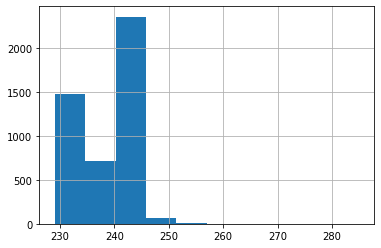

In [65]:
# смотрю разброс значений и наличие "не правильных" значений

rfm.date_submitted.hist()

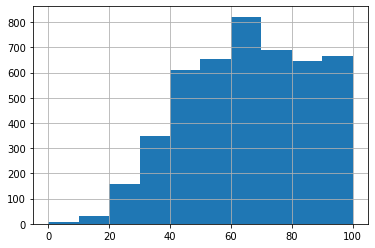

In [66]:
# смотрю разброс значений и наличие "не правильных" значений (например > 100)

rfm.score.hist()

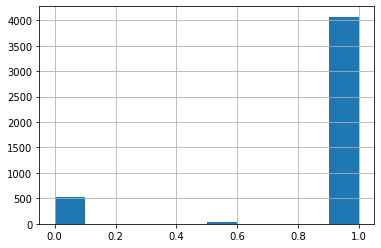

In [67]:
# смотрю разброс значений и наличие "не правильных" значений (например > 1)

rfm.completion.hist()

**Разбросы значений не большие, поэтому создам по три диапазона:** 

**R** - date_submitted :  
1. до 240
2. 240-250
3. 250 и более  

**M** - score :  
1. до 35
2. 35-70
3. 70 и более  

**F** - completion : (выбрал такие диапазоны, на случай если данные дополнятся,обновятся и курсов будет больше двух)  
1. до 0,33
2. 0,33 - 0,66
3. 0,66 и более

 Пишу функции для присвоения оценок от 1 до 3:  
  - Чем меньше значение date_submitted, тем лучше, значит материалы курсов  усваивается быстро  
  - Чем больше значение score, тем лучше, значит материалы курсов хорошо закрепились у студента  
  - Чем больше значение completion, тем лучше качество курсов

In [68]:
def r_score(x):
    if x <= 240:
        return 3
    elif x > 241 and x < 250:
        return 2
    else:
        return 1

def m_score(x):
    if x <= 35:
        return 1
    elif x > 35 and x < 70 :
        return 2
    else:
        return 3   

def f_score(x):
    if x <= 0.33:
        return 1
    elif x > 0.33 and x < 0.66:
        return 2
    else:
        return 3

In [69]:
# добавляю оценки в таблицу

rfm['R'] = rfm['date_submitted'].apply(lambda x: r_score(x))
rfm['F'] = rfm['completion'].apply(lambda x: f_score(x))
rfm['M'] = rfm['score'].apply(lambda x: m_score(x))

In [70]:
rfm.head()

,id_student,date_submitted,completion,score,R,F,M
0,23698,243.0,1.0,80.0,2,3,3
1,24213,236.0,1.0,58.0,3,3,2
2,27116,243.0,1.0,96.0,2,3,3
3,28046,237.0,1.0,40.0,3,3,2
4,28787,243.0,1.0,44.0,2,3,2


In [71]:
# объединяю оценки R, F, M в столбец "RFM Score"

rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,id_student,date_submitted,completion,score,R,F,M,RFM_Score
0,23698,243.0,1.0,80.0,2,3,3,233
1,24213,236.0,1.0,58.0,3,3,2,332
2,27116,243.0,1.0,96.0,2,3,3,233
3,28046,237.0,1.0,40.0,3,3,2,332
4,28787,243.0,1.0,44.0,2,3,2,232


In [72]:
# получившиеся сигменты и их процентная доля

rfm.RFM_Score.value_counts(normalize=True)*100

332    21.346859
233    20.656162
232    20.505072
333    20.181308
211     3.885172
311     3.539823
132     2.719620
133     2.417440
212     1.834664
312     1.791496
322     0.474854
112     0.280596
111     0.237427
222     0.064753
321     0.021584
221     0.021584
122     0.021584
Name: RFM_Score, dtype: float64

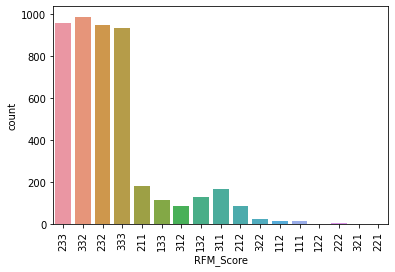

In [73]:
# график получившихся сигментов и их кол-во

plt.xticks(rotation=90)
sns.countplot(x=rfm['RFM_Score'])

**Выделю основные сигменты :**

- **losers** - студенты которые медленно проходили курс, не сдали экзамен, за экзамен были низкие баллы (R-score 1; F-score 1; M-score 1)  
- **best studets**  - студенты которые быстро проходили курс, сдали экзамен, за экзамен были высокие баллы (R-score 3; F-score 3; M-score 3)
- **not pass exam** - студенты которые не сдали ни один экзамен (R-score 1-3; F-score 1; M-score 1-2) 
- **good studets**  - студенты которые в быстром или нормальном темпе проходили курс, сдали экзамен, за экзамен были хоршие или высокие баллы (R-score 2-3; F-score 3; M-score 2-3)
- **slow good studets** - студенты которые медленно проходили курс, сдали экзамен, за экзамен были хоршие или высокие баллы (R-score 1; F-score 3; M-score 2-3) 
- **fast pass one exam** - студенты которые быстро проходили курс, сдали один из двух экзаменов, за экзамен были хоршие или высокие баллы (R-score 3; F-score 2; M-score 2-3) 
- **pass one exam**  - студенты которые в нормальном темпе проходили курс, сдали один из двух экзаменов, за экзамен были хоршие или высокие баллы (R-score 2; F-score 2; M-score 2-3)
- **slow one exam**  - студенты которые медленно проходили курс, сдали один из двух экзаменов, за экзамен были низкие баллы (R-score 1; F-score 2; M-score 1-3)
- **one exam low score** - студенты которые в нормальном или высоком темпе проходили курс, сдали один из двух экзаменов, за экзамен были низкие баллы (R-score 2-3; F-score 2; M-score 1)    

In [74]:
# создаю столбец с сигментами студнтов

segment = {
    r'111': 'losers',
    r'333': 'best studets',
    r'[1-3]1[1-2]': 'not pass exam',
    r'[2-3]3[2-3]': 'good studets',
    r'13[2-3]': 'slow good studets',
    r'32[2-3]': 'fast pass one exam',
    r'22[2-3]': 'pass one exam',
    r'12[1-3]': 'slow one exam',
    r'[2-3]21': 'one exam low score'
    
    }

rfm['segment'] = rfm['RFM_Score'].replace(segment, regex=True)
rfm.head()

,id_student,date_submitted,completion,score,R,F,M,RFM_Score,segment
0,23698,243.0,1.0,80.0,2,3,3,233,good studets
1,24213,236.0,1.0,58.0,3,3,2,332,good studets
2,27116,243.0,1.0,96.0,2,3,3,233,good studets
3,28046,237.0,1.0,40.0,3,3,2,332,good studets
4,28787,243.0,1.0,44.0,2,3,2,232,good studets


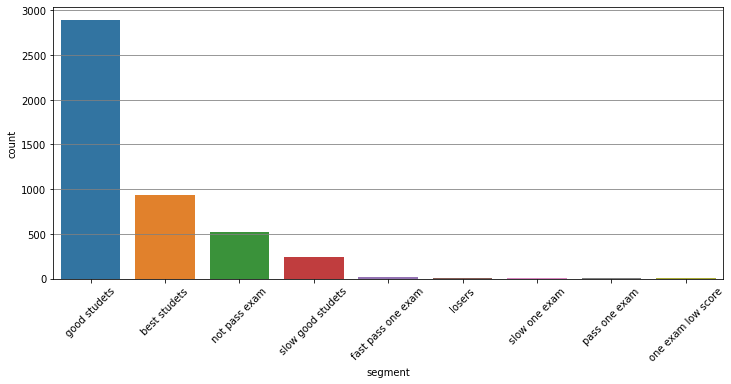

In [75]:
# визуализация полученных данных

plt.figure(figsize=(12,5))
plt.grid(color='grey')
plt.xticks(rotation=45)
sns.countplot(x=rfm['segment'])


In [76]:
rfm.segment.value_counts(normalize=True)*100

good studets          62.508094
best studets          20.181308
not pass exam         11.331750
slow good studets      5.137060
fast pass one exam     0.474854
losers                 0.237427
pass one exam          0.064753
one exam low score     0.043169
slow one exam          0.021584
Name: segment, dtype: float64

**Выводы по нашей аудитории**:  
 - примерно 62% студенты которые в быстром или нормальном темпе проходили курс, сдали экзамен, за экзамен были хоршие или высокие баллы  
 - примерно 20% студенты которые быстро проходили курс, сдали экзамен, за экзамен были высокие баллы  
 - около 11% студентов не сдали ни один экзамен  
 - около 5% студенты которые медленно проходили курс, сдали экзамен, за экзамен были хоршие или высокие баллы
 - остальные 2% студенты сдали хотябы один экзамен с разным темпом прохождения курсов и разными баллами